In [1]:
import numpy as np
import pandas as pd

# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
tstamp = "2022_02_04_2022_02_03_12_14"

In [3]:
data= pd.read_csv(f"results/{tstamp[11:]}_flares_validate.csv")

In [4]:
data.columns

Index(['istart', 'istop', 'tstart', 'tstop', 'ed_rec', 'ed_rec_err',
       'ampl_rec', 'dur', 'total_n_valid_data_points', 'midlat_deg',
       'inclination_deg', 'n_spots', 'beta_1', 'alpha_1', 'lon_deg_1',
       'lat_deg_1', 'beta_2', 'alpha_2', 'lon_deg_2', 'lat_deg_2', 'beta_3',
       'alpha_3', 'lon_deg_3', 'lat_deg_3', 'starid'],
      dtype='object')

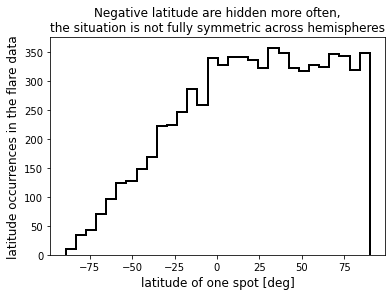

In [17]:
plt.figure(figsize=(6,4))
plt.hist(data.lat_deg_1.unique(), bins=30, histtype="step", edgecolor="k", linewidth=2)
plt.xlabel("latitude of one spot [deg]", fontsize=12)
plt.ylabel("latitude occurrences in the flare data", fontsize=12)
plt.title("Negative latitude are hidden more often,\n"
          "the situation is not fully symmetric across hemispheres");


In [19]:
overview = pd.read_csv("results/overview_synthetic_data.csv")
metavals = overview[(overview.tstamp==tstamp[11:]) & (overview.typ == "train")].iloc[0]
meta = (f"Dataset {metavals.tstamp} with parameters:\n"
        f"alpha = {metavals.alphamin}-{metavals.alphamax}\n"
        f"beta = {metavals.betamin}-{metavals.betamax}\n"
        f"{metavals.n_spots_min}-{metavals.n_spots_max} spots\n"
        f"spot radius  = {metavals.spot_radius}\n"
        f"{metavals.n_lcs} light curves\n"
        f"ED decomposition: {metavals.decomposeed}\n\n")

In [20]:
df = pd.read_csv(f"results/{tstamp}_flares_train_merged.csv")
df.shape

(5804, 14)

In [21]:
colids = np.where([("diff" in x) for x in  df.columns.values])[0]
columns = df.columns.values[colids]
columns

array(['diff_tstart_kurtosis_stepsize1', 'diff_tstart_skew_stepsize1',
       'diff_tstart_std_over_mean_stepsize1',
       'diff_tstart_kurtosis_stepsize2', 'diff_tstart_skew_stepsize2',
       'diff_tstart_std_over_mean_stepsize2',
       'diff_tstart_kurtosis_stepsize3', 'diff_tstart_skew_stepsize3',
       'diff_tstart_std_over_mean_stepsize3'], dtype=object)

In [28]:
df = df.fillna(-999)
df.head()

,midlat_deg,diff_tstart_kurtosis_stepsize1,diff_tstart_skew_stepsize1,diff_tstart_std_over_mean_stepsize1,diff_tstart_kurtosis_stepsize2,diff_tstart_skew_stepsize2,diff_tstart_std_over_mean_stepsize2,diff_tstart_kurtosis_stepsize3,diff_tstart_skew_stepsize3,diff_tstart_std_over_mean_stepsize3,midlat2,minlat,maxlat,latwidth
0,"(-88.398, -88.089]",-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-88.243533,-88.398119,-88.088947,0.309172
1,"(-88.089, -87.78]",-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-87.934361,-88.088947,-87.779775,0.309172
2,"(-87.78, -87.471]",-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-87.625189,-87.779775,-87.470603,0.309172
3,"(-87.471, -87.161]",-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-87.316017,-87.470603,-87.161431,0.309172
4,"(-87.161, -86.852]",2.754101,1.818962,0.906416,-0.717243,0.614398,0.523308,-1.220704,0.130281,0.368084,-87.006846,-87.161431,-86.852260,0.309172


In [23]:
x = df[columns].values 
x.shape

(5804, 9)

In [24]:
y = df["midlat2"].values

In [25]:
# create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(x, y) 

RandomForestRegressor(random_state=0)

In [29]:
# read validation data
valid = pd.read_csv(f"results/{tstamp}_flares_validate_merged.csv")
valid.head(10)

,midlat_deg,diff_tstart_kurtosis_stepsize1,diff_tstart_skew_stepsize1,diff_tstart_std_over_mean_stepsize1,diff_tstart_kurtosis_stepsize2,diff_tstart_skew_stepsize2,diff_tstart_std_over_mean_stepsize2,diff_tstart_kurtosis_stepsize3,diff_tstart_skew_stepsize3,diff_tstart_std_over_mean_stepsize3,midlat2,minlat,maxlat,latwidth
0,"(-89.171, -88.865]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-89.017981,-89.171116,-88.864846,0.30627
1,"(-88.865, -88.559]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-88.711711,-88.864846,-88.558576,0.30627
2,"(-88.559, -88.252]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-88.405441,-88.558576,-88.252306,0.30627
3,"(-88.252, -87.946]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-88.099171,-88.252306,-87.946035,0.30627
4,"(-87.946, -87.64]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-87.792900,-87.946035,-87.639765,0.30627
5,"(-87.64, -87.333]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-87.486630,-87.639765,-87.333495,0.30627
6,"(-87.333, -87.027]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-87.180360,-87.333495,-87.027225,0.30627
7,"(-87.027, -86.721]",-3.191688,0.366359,0.453367,NaN,1.152070,0.121195,NaN,NaN,0.233722,-86.874090,-87.027225,-86.720955,0.30627
8,"(-86.721, -86.415]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-86.567820,-86.720955,-86.414685,0.30627
9,"(-86.415, -86.108]",-0.246618,0.828030,0.774737,-1.650751,0.556146,0.650171,-1.580055,0.527901,0.617614,-86.261550,-86.414685,-86.108415,0.30627


In [30]:
valid = valid.fillna(-999)
validx = valid[columns].values 
validy = valid['midlat2'].values
validx.shape

(585, 9)

In [31]:
predictions = regressor.predict(validx)

In [32]:
errors = predictions - validy

In [33]:
feature_list = list(valid[columns].columns.values)

In [39]:
# Get numerical feature importances
importances = list(regressor.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
legend = "".join(["Feature importance:\n"] + ['{:.2f} -- {}\n'.format(*pair[::-1]) for pair in feature_importances])

In [40]:
extranote = "\nNote:\nactive latitude on both hemispheres"
legend = meta + legend + extranote

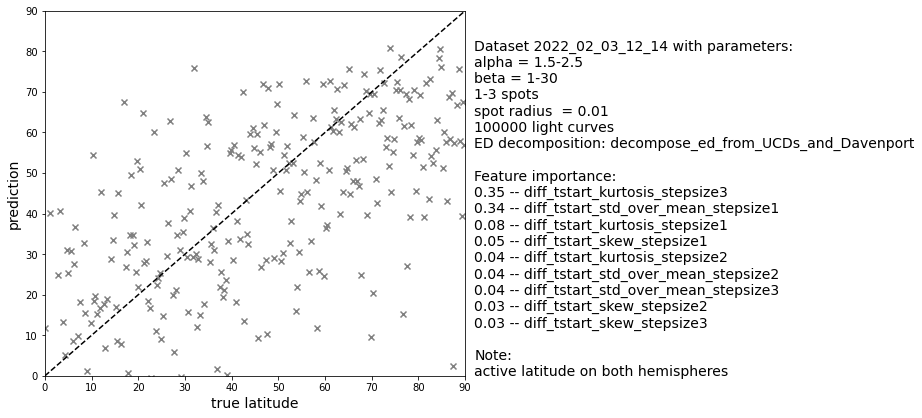

In [41]:
plt.figure(figsize=(13,6))
plt.scatter(validy, predictions, 
            marker="x",c="grey",)
plt.plot([0,90], [0,90], c="k", linestyle="dashed")
plt.xlim(0,90)
plt.ylim(0,90)
plt.xlabel("true latitude", fontsize=14)
plt.ylabel("prediction", fontsize=14)
plt.text(x=92, y=0,s=legend, fontsize=14)
plt.tight_layout()

## related notes

In [ ]:
from flares.decomposeed import decompose_ed_randomly_and_using_Davenport

Text(0, 0.5, 'FWHM [d]')

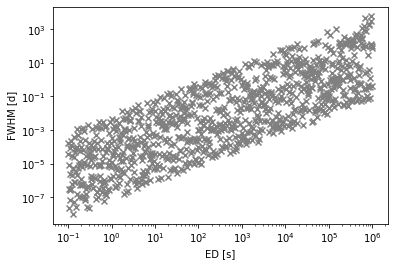

In [87]:
ed = np.logspace(-1,6,1000)
a, fwhm = decompose_ed_randomly_and_using_Davenport(ed)
plt.scatter(ed, fwhm, marker="x", c="grey")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("ED [s]")
plt.ylabel("FWHM [d]")

Text(0, 0.5, 'rel. amplitude')

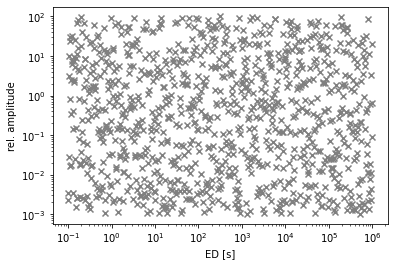

In [88]:
ed = np.logspace(-1,6,1000)
a, fwhm = decompose_ed_randomly_and_using_Davenport(ed)
plt.scatter(ed, a, marker="x", c="grey")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("ED [s]")
plt.ylabel("rel. amplitude")

In [23]:
dd = pd.read_csv("results/2022_01_10_flares_alpha_beta_rand.csv", names=['istart','istop','tstart','tstop',                  
                              'ed_rec','ed_rec_err','ampl_rec',
                              'dur','total_n_valid_data_points','midlat_deg',
                              'inclination_deg','n_spots','beta_1',
                              'beta_2','beta_3','alpha_1',
                              'alpha_2','alpha_3','lons_1',
                              'lons_2','lons_3','starid']
           )

<AxesSubplot:>

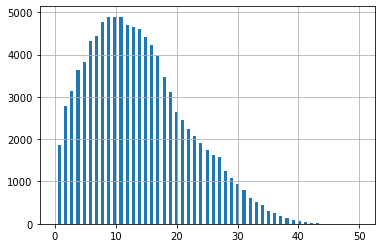

In [22]:
dd.groupby("starid").tstart.count().hist(bins=np.linspace(0,50,100))

<AxesSubplot:>

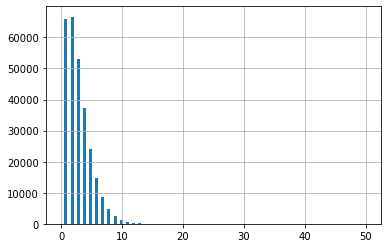

In [24]:
dd.groupby("starid").tstart.count().hist(bins=np.linspace(0,50,100))